In [1]:
import pandas as pd

In [2]:
from pathlib import Path

In [3]:
in_dir = Path('data/logs/step_log_2023-12-13_14-02.csv')

In [4]:
logs = [pd.read_csv('../../data/logs/step_log_2023-12-13_14-02.csv')]

In [5]:
# logs = []

# for f in in_dir.iterdir():
#     try:
#         this_log = pd.read_csv(f)
#     except:
#         print(f)

#     if '12-12_04-48' not in f.name:
#        continue

#     logs.append(this_log)

In [6]:
all_logs = pd.concat(logs)

In [7]:
all_logs.loc[all_logs['Cell Index'] == 740]

,Episode,Total Reward,Epsilon,Cell Index,Action Type,Reward,Energy Output,Unmet Demand


In [8]:
all_logs['Unmet Demand'].min()

24123333.0

In [9]:
all_logs = all_logs.reset_index()

In [10]:
all_logs['Unmet Demand'].argmin()

1927

In [11]:
all_logs['Epsilon'] = all_logs['Epsilon'].bfill()
all_logs['Episode'] = all_logs['Episode'].bfill()
all_logs['Total Reward'] = all_logs['Total Reward'].bfill()

In [12]:
all_logs = all_logs.sort_values(by=['Episode', 'index'], ascending=[True, True])
all_logs

,index,Episode,Total Reward,Epsilon,Cell Index,Action Type,Reward,Energy Output,Unmet Demand
0,0,1.0,13.060276,1.00,4459.0,solar,0.0,501600.0,56685899.0
1,1,1.0,13.060276,1.00,12761.0,solar,0.0,999495.0,56188004.0
2,2,1.0,13.060276,1.00,4933.0,wind,0.0,1018498.0,56169001.0
3,3,1.0,13.060276,1.00,5323.0,solar,1.0,1556008.0,55631491.0
4,4,1.0,13.060276,1.00,15961.0,wind,0.0,1603037.0,55584462.0
...,...,...,...,...,...,...,...,...,...
70518,70518,256.0,35.431317,0.01,12754.0,wind,0.0,57059329.0,26008820.0
70519,70519,256.0,35.431317,0.01,14823.0,wind,0.0,57080895.0,25996812.0
70520,70520,256.0,35.431317,0.01,15858.0,wind,0.0,57119819.0,25976088.0
70521,70521,256.0,35.431317,0.01,11830.0,wind,0.0,57258059.0,25895108.0


In [13]:
res = all_logs.groupby(by='Episode').agg({'Total Reward': 'max', 'Unmet Demand': 'min', 
                                         'Epsilon': 'first'})

In [14]:
res['rolling_mean_reward'] = res['Total Reward'].rolling(5).mean()
res['rolling_mean_unmet'] = res['Unmet Demand'].rolling(5).mean()

In [15]:
res

,Total Reward,Unmet Demand,Epsilon,rolling_mean_reward,rolling_mean_unmet
Episode,,,,,
1.0,13.060276,25594632.0,1.000000,NaN,NaN
2.0,29.301591,25879377.0,0.965000,NaN,NaN
3.0,22.980587,25657933.0,0.931225,NaN,NaN
4.0,20.393932,26250168.0,0.898632,NaN,NaN
5.0,5.664935,26156175.0,0.867180,18.280264,25907657.0
...,...,...,...,...,...
252.0,35.925374,27096446.0,0.010000,32.611238,26943181.4
253.0,43.512600,27158993.0,0.010000,36.590563,26873750.8
254.0,34.880309,26636703.0,0.010000,36.315462,26891990.8


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


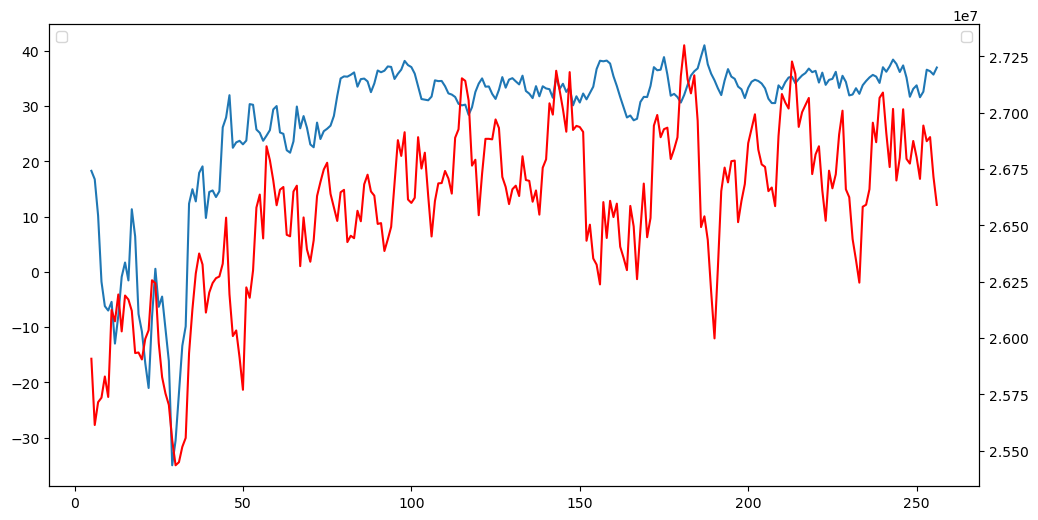

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
ax2 = ax.twinx()

#ax.plot(res['Total Reward'], label='reward', alpha=0.7, linewidth=1.5,)
ax.plot(res['rolling_mean_reward'], label=None, linewidth=1.5, color='C0')
#ax2.plot(res['Unmet Demand'], color='red', label='unmet demand', alpha=0.7, linewidth=1.5)
ax2.plot(res['rolling_mean_unmet'], label=None, linewidth=1.5, color='red')

ax.legend(loc='upper left')
ax2.legend(loc='upper right')

In [17]:
res.index.values

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

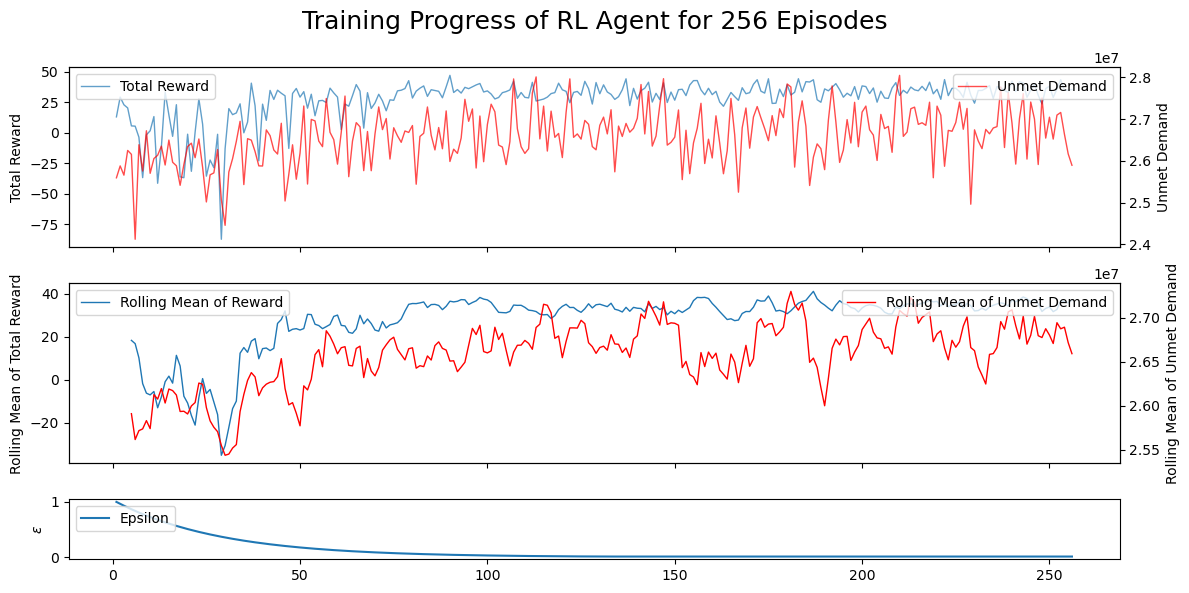

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 6), gridspec_kw={'height_ratios': [3, 3, 1]}, sharex=True)

ax_flat = ax.flatten()

ax0_0 = ax_flat[0]
ax0_1 = ax0_0.twinx()
ax1_0 = ax_flat[1]
ax1_1 = ax1_0.twinx()
ax2_0 = ax_flat[2]

ax0_0.plot(res.index.values, res['Total Reward'], label='Total Reward', alpha=0.7, linewidth=1)
ax0_1.plot(res.index.values, res['Unmet Demand'], color='red', label='Unmet Demand', alpha=0.7, linewidth=1)
ax0_0.set_ylabel('Total Reward')
ax0_1.set_ylabel('Unmet Demand')
ax0_0.legend(loc='upper left')
ax0_1.legend(loc='upper right')

ax1_0.plot(res.index.values, res['rolling_mean_reward'], linewidth=1, label='Rolling Mean of Reward')
ax1_1.plot(res.index.values, res['rolling_mean_unmet'], linewidth=1, color='red', label='Rolling Mean of Unmet Demand')
ax1_0.set_ylabel('Rolling Mean of Total Reward')
ax1_1.set_ylabel('Rolling Mean of Unmet Demand')
ax1_0.legend(loc='upper left')
ax1_1.legend(loc='upper right')

ax2_0.plot(res.index.values, res['Epsilon'], label='Epsilon')
ax2_0.set_ylabel('$\epsilon$')
ax2_0.legend(loc='upper left')

plt.suptitle('Training Progress of RL Agent for 256 Episodes', size=18)
plt.tight_layout()
plt.savefig('../../figures/final_model_training_logs.png', dpi=300)

In [19]:
%matplotlib inline



plt.scatter(best_unmet, rewards)

NameError: name 'best_unmet' is not defined

In [ ]:
(all_logs.groupby(by=['Episode', 'Cell Index']).size().sort_values() == 2).sum()

In [ ]:
(all_logs.groupby(by=['Episode', 'Cell Index']).size().sort_values() == 1).sum()

In [ ]:
all_logs.groupby(by='Cell Index').size().quantile(0.95)

In [ ]:
choice_groups = all_logs.groupby(by='Cell Index').agg({'index': 'count', 'Reward': 'mean'})
choice_groups = choice_groups.rename(columns={'index': 'n_times_chosen', 'Reward': 'mean_reward'})
choice_groups

In [ ]:
all_logs['Episode'].max()

In [ ]:
choice_groups.groupby(by='n_times_chosen')['mean_reward'].mean()

In [ ]:
choice_groups.loc[choice_groups['n_times_chosen'] == 29]

In [ ]:
all_logs.loc[all_logs['Cell Index'] == 1859].sort_values(by='Episode')

In [ ]:
choice_groups.loc[choice_groups['n_times_chosen'] == 12]

In [ ]:
action_type_agg_count = all_logs.groupby(by=['Episode', 'Action Type']).size()
action_type_agg_count.name = 'count'
action_type_agg_count = action_type_agg_count.reset_index()

unmet_demand = all_logs.groupby(by='Episode').agg({'Unmet Demand': 'min'})
total_reward = all_logs.groupby(by='Episode').agg({'Total Reward': 'last'})

action_type_agg_count = action_type_agg_count.merge(unmet_demand, on='Episode', how='left')
action_type_agg_count = action_type_agg_count.merge(total_reward, on='Episode', how='left')

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

action_type_agg_count.loc[action_type_agg_count['Action Type'] == 'solar'].plot.scatter('count', 'Unmet Demand', title='Count of Solar Installations in Episode', ax=ax)

ax.set_ylabel('Unmet Demand at End of Episode')

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

action_type_agg_count.loc[action_type_agg_count['Action Type'] == 'solar'].plot.scatter('count', 'Total Reward', title='Count of Solar Installations in Episode', ax=ax)

ax.set_ylabel('Total Reward at End of Episode')

In [ ]:
action_type_agg_count.sort_values(by='Unmet Demand')

In [ ]:
action_type_agg_count.sort_values(by='Episode')